In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import wave
from pydub import AudioSegment
import scipy
from scipy.io import wavfile #audio i/o
from IPython.display import Audio #listening to audio
import thinkdsp
import thinkstats2
%matplotlib inline

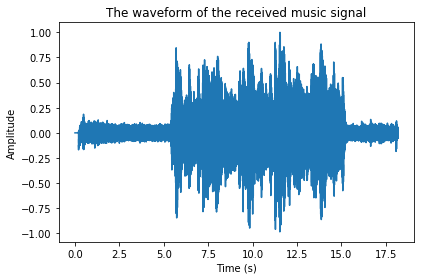

In [2]:
mr_wave = thinkdsp.read_wave("Spot1_normal_right_channel.wav")
mr_wave.plot()
thinkdsp.decorate(xlabel = "Time (s)", ylabel = "Amplitude", title = "The waveform of the received music signal")
mr_wave.make_audio()

LinregressResult(slope=-1.7530770132510691, intercept=16.51362880194472, rvalue=-0.6790442479575061, pvalue=0.0, stderr=0.009024998246822891)

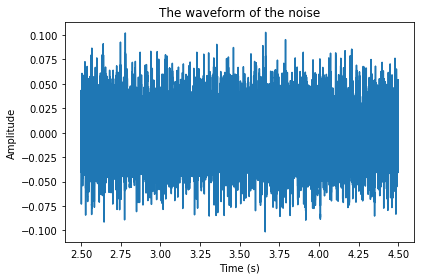

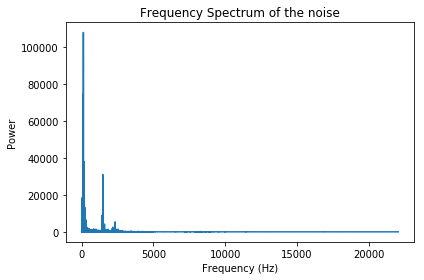

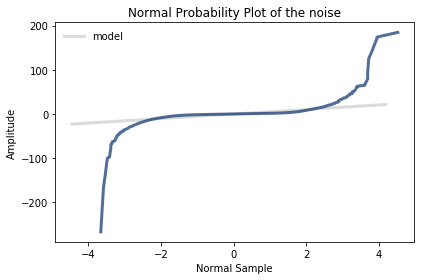

In [3]:
# Take the noise part for analysis
noise_seg = mr_wave.segment(start = 2.5, duration = 2)
noise_seg.plot()
thinkdsp.decorate(xlabel = "Time (s)", ylabel = "Amplitude", title = "The waveform of the noise")
# check if it is Gaussian White Noise
# Plot spectrum
noise_spec = noise_seg.make_spectrum()
plt.figure()
noise_spec.plot_power()
thinkdsp.decorate(xlabel = "Frequency (Hz)", ylabel = "Power", title = "Frequency Spectrum of the noise")
plt.figure()
thinkstats2.NormalProbabilityPlot(noise_spec.real)
thinkdsp.decorate(xlabel = "Normal Sample", ylabel = "Amplitude", title = "Normal Probability Plot of the noise")
noise_spec.estimate_slope()

Conclusion: The noise recorded by is not a Gaussian White noise, but pink noise $\beta = -1.75$.

Try to make an artificial Gaussian White Noise and record.

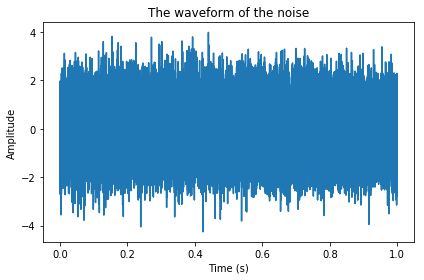

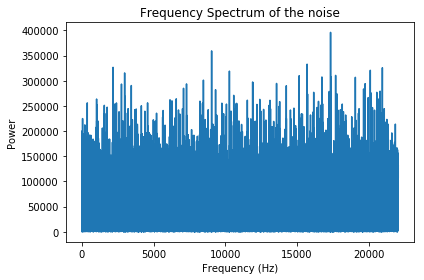

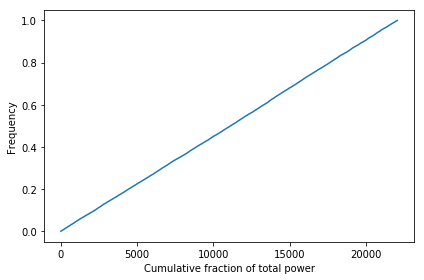

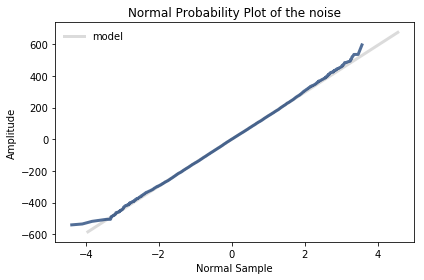

In [4]:
# Generate a Gaussian White Noise
from thinkdsp import UncorrelatedGaussianNoise

signal = UncorrelatedGaussianNoise()
mt_noise = signal.make_wave(duration=1, framerate=44100)
mt_noise.plot()
thinkdsp.decorate(xlabel = "Time (s)", ylabel = "Amplitude", title = "The waveform of the noise")
mt_noise.make_audio()
mt_noise_spec = mt_noise.make_spectrum()
plt.figure()
mt_noise_spec.plot_power()
thinkdsp.decorate(xlabel = "Frequency (Hz)", ylabel = "Power", title = "Frequency Spectrum of the noise")
mt_noise_intspec = mt_noise_spec.make_integrated_spectrum()
plt.figure()
mt_noise_intspec.plot_power()
thinkdsp.decorate(xlabel = "Cumulative fraction of total power", ylabel = "Frequency")
plt.figure()
thinkstats2.NormalProbabilityPlot(mt_noise_spec.real)
thinkdsp.decorate(xlabel = "Normal Sample", ylabel = "Amplitude", title = "Normal Probability Plot of the noise")

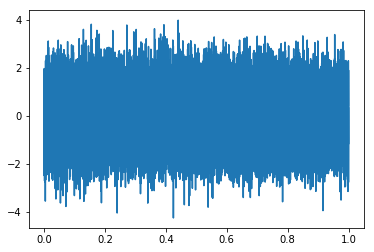

In [14]:
mt_noise.plot()

[ 0.00079973  0.03833891 -0.097682   ... -0.097682    0.03833891
  0.00079973]


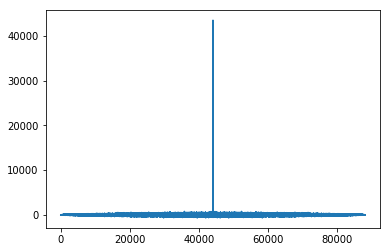

In [17]:
noise_corr = np.correlate(mt_noise.ys, mt_noise.ys,'full')
plt.plot(noise_corr)
print(noise_corr)

In [7]:
mt_noise.write(filename = "White Noise.wav")
mt_noise.make_audio()

Writing White Noise.wav


In [8]:
music = thinkdsp.read_wave("music.wav")
mt_music = music.segment(start = 1, duration = 3)
mt_music.make_audio()

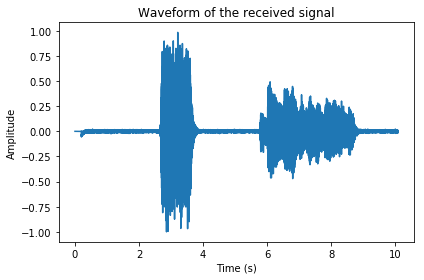

In [9]:
mr_wav = thinkdsp.read_wave("Noise_music.wav")
mr_wav.plot()
thinkdsp.decorate(xlabel = "Time (s)", ylabel = "Amplitude", title="Waveform of the received signal")
mr_wav.make_audio()

31025


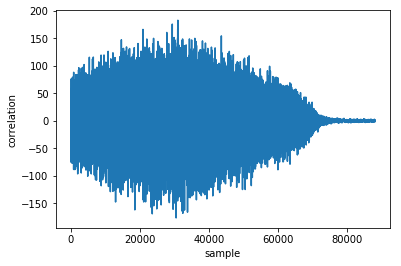

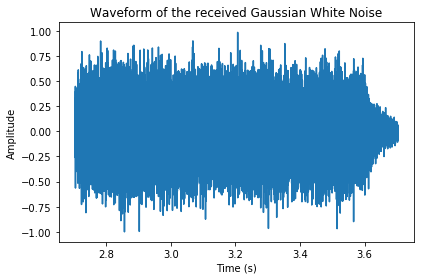

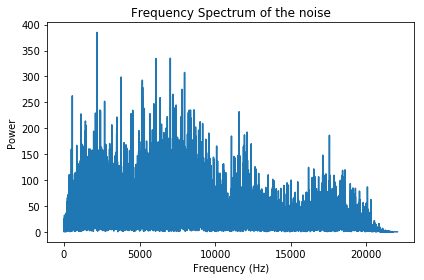

In [10]:
corr = np.correlate(mr_wav.segment(start = 2, duration = 3).ys, mt_noise.ys, 'valid')
plt.figure()
plt.plot(corr)
plt.xlabel("sample")
plt.ylabel("correlation")
start_idx = list(corr).index(np.max(corr))
print(start_idx)
mr_ugn = mr_wav.segment(start = 2+start_idx/44100, duration = 1)
plt.figure()
mr_ugn.plot()
thinkdsp.decorate(xlabel = "Time (s)", ylabel = "Amplitude", title="Waveform of the received Gaussian White Noise")
mr_ugn_spec = mr_ugn.make_spectrum()
plt.figure()
mr_ugn_spec.plot()
thinkdsp.decorate(xlabel = "Frequency (Hz)", ylabel = "Power", title = "Frequency Spectrum of the noise")

C:\Users\lhf\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


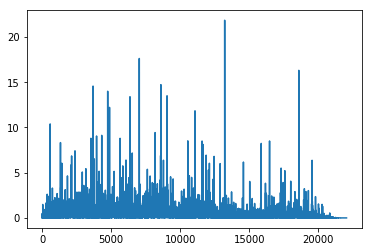

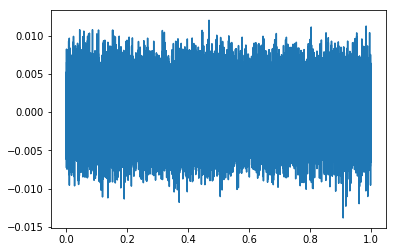

In [11]:
transfer = thinkdsp.Spectrum(np.fft.rfft(mr_ugn.ys)/np.fft.rfft(mt_noise.ys), np.linspace(0, 44100/2, 44100/2+1), framerate = 44100)
transfer.plot()
response = transfer.make_wave()
plt.figure()
response.plot()


Text(0.5,1,'The channel impulse response')

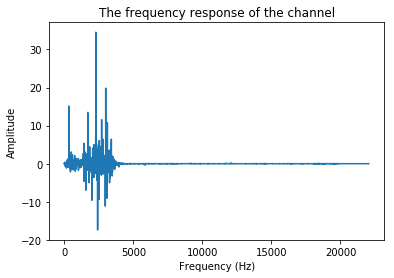

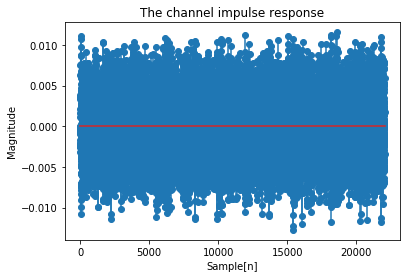

In [76]:
H = np.fft.rfft(mr_ugn.ys, len(mt_noise.ys))/np.fft.rfft(mt_noise.ys)
plt.figure()
plt.plot(H)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('The frequency response of the channel')

h = np.fft.ifft(H)
plt.figure()
plt.stem(h)
plt.xlabel('Sample[n]')
plt.ylabel('Magnitude')
plt.title('The channel impulse response')

Observation: Although the transmitted signal include all the frequency band, the received signal only contain the lower frequency band. **(Why?)**

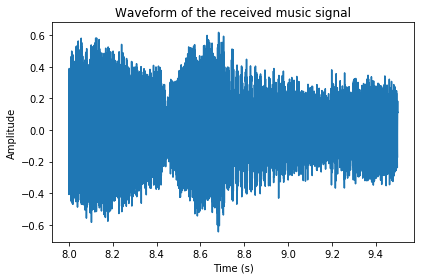

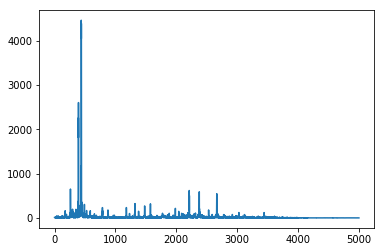

In [89]:
mr_music = mr_wav.segment(start = 8, duration = 1.5)
mr_music.plot()
thinkdsp.decorate(xlabel = "Time (s)", ylabel = "Amplitude", title="Waveform of the received music signal")
mr_music_spec = mr_music.make_spectrum()
plt.figure()
mr_music_spec.plot(high =5000)
mr_music.make_audio()